# loading necessary libraries

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Loading MNIST dataset

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
y_train.shape

(60000,)

In [18]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# visualizing input samples and their correspinding tag

In [19]:
def plot_sample(image_index):
    plt.imshow(x_train[image_index],cmap='Greys')
    print("Label is:", y_train[image_index])

Label is: 3


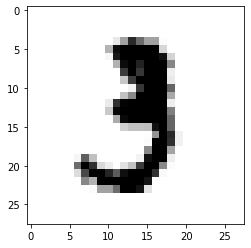

In [20]:
plot_sample(10)

Label is: 5


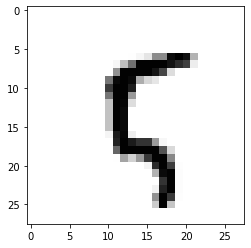

In [21]:
plot_sample(100)

Label is: 7


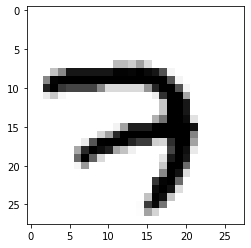

In [22]:
plot_sample(5000)

Label is: 8


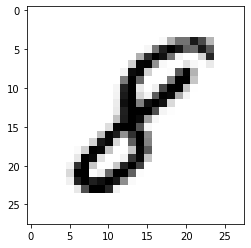

In [23]:
plot_sample(7777)

# Reshaping and Normalizing the Images

In [24]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  #introduce the no of input channels
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [25]:
# Making sure that the pixel values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [26]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [27]:
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [28]:
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

Number of images in x_train 60000
Number of images in x_test 10000


# Building the Convolutional Neural Network

In [29]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [30]:
# Creating a Sequential Model and adding the layers
model = Sequential()

#adding a convolutional layer with 28 filters
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))

#adding a pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

In [31]:
# Flattening the 2D arrays for fully connected layers
model.add(Flatten()) 


model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

# Compiling and Fitting the Model

In [32]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [33]:
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 16ms/step - loss: 0.2129 - accuracy: 0.9362
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0825 - accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0563 - accuracy: 0.9827
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0436 - accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0330 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0303 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0239 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0221 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0207 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [41]:
y_predicted=model.predict(x_test)
y_pred_class=[np.argmax(ele) for ele in y_predicted]

# evaluating the model

In [35]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0655 - accuracy: 0.9840


[0.06549894064664841, 0.984000027179718]

# making individual predictions

9


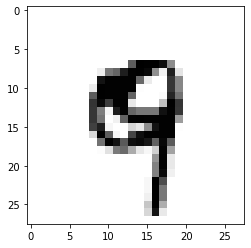

In [36]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

# classification report

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

